# <center><font color='OrangeRed'> Сегментация пользователей по потреблению продуктами и услугами банка "Метанпромбанк"</font></center>

Мною будет подготовлен аналитическое исследование данных по клиентам банка "Метанпромбанк" с целью сегментирования пользователей и разработке рекомендаций по стратегии взаимодействия с клиентами. Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск

Данные были собраны сотрудниками банка посредство анкетирования клиентов. В дальнейшем эти данные были вручную внесены в CRM-систему. 

**Цель** - выделись основные целевые группы пользователей для дальнейшей работы с ними.

**Задачи**:
 - Проведение исследовательского анализа данных (EDA);
 - Сегментация пользователей на основе данных о количестве потребляемых продуктов;
 - Формулировка и проверка статистических гипотез:
     1. Гипотеза 1 - гипотеза различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним;
     2. Гипотеза 2 - будет сформулирована по результатам предварительного исследования.
 - Написание общего вывода по результатам исследования;
 - Разработка рекомендаций и предложений по работе с клиентами банками.

В датасет входит следующая информация:

- **userid** — идентификатор пользователя;
- **score** — баллы кредитного скоринга;
- **City** — город;
- **Gender** — пол;
- **Age** — возраст;
- **Objects** — количество объектов в собственности;
- **Balance** — баланс на счёте;
- **Products** — количество продуктов, которыми пользуется клиент;
- **CreditCard** — есть ли кредитная карта;
- **Loyalty** — активный клиент;
- **estimated_salary** — заработная плата клиента;
- **Churn** — ушёл или нет.

**Этапы исследования**:
   1. [Предобработка данных](#obzor)
   2. [Исследовательский анализ данных (EDA)](#eda)
   3. [Сегментация пользователей на основе данных о количестве потребляемых продуктов](#segment)
   4. [Проверка статистических гипотез](#gip)
   5. [Общий вывод](#vyvod)
   6. [Рекомендации для сотрудников банка "Метанпромбанк"](#recomend)
   7. [Дополнительные материалы по исследованию](#dop)
       1. [Презентация](#prezent)
       2. [Дашборд](#dash)

# <a id="obzor"></a><font style="background-color: Cyan; color=black">1. Предобработка данных</font> #

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import warnings

from matplotlib import pyplot
from plotly.subplots import make_subplots
from scipy import stats as st
import plotly.graph_objects as go

pd.options.display.max_colwidth = 100000
pd.options.display.max_rows = 600

In [2]:
df = pd.read_csv(r'C:\\Users\Dmitry I. Gulidov\Desktop\Проект\bank_dataset.csv')

Предпросмотр данных

In [3]:
df.sample(n=10, random_state=0)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
9394,15658489,597,Ростов Великий,Ж,35,8,131101.04,1,1,1,192852.67,0
898,15697436,523,Ярославль,Ж,40,2,102967.41,1,1,0,128702.10,1
2398,15676613,706,Рыбинск,Ж,42,8,95386.82,1,1,1,75732.25,0
5906,15788359,788,Ярославль,М,32,4,112079.58,1,0,0,89368.59,0
2343,15808638,706,Ростов Великий,М,38,5,163034.82,2,1,1,135662.17,0
8225,15846878,670,Рыбинск,Ж,57,3,175575.95,2,1,0,99061.75,1
5506,15739764,590,Рыбинск,М,34,0,65812.35,2,0,1,160346.30,0
6451,15765319,636,Рыбинск,Ж,29,6,157576.47,2,1,1,101102.39,0
2670,15803182,598,Ярославль,Ж,64,9,NaN,1,0,1,13181.37,1
3497,15631680,456,Ярославль,Ж,63,1,165350.61,2,0,0,140758.07,1


Общая информация о датафрейме

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Количество пропусков

In [5]:
df.isna().sum()

userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64

**3617** пропусков в графе **Баланс** - значимое количество (почти 36% от общего количества клиентов банка). Однако баланс действительно может быть равен нулю. Вероятно, у данного клиента нет дебетовой карты, он пользуется другими услугами банка (кредит, инвестиционный счёт, кредитная карта)

В данном случае пропуски можно заменить на **0**.

In [6]:
df = df.fillna(0)

Для удобства отображения и изучения данных приведу названия колонок к *нижнему регистру*.

In [7]:
df.columns = [each.lower() for each in df]

In [8]:
print(f'Количество дубликатов - {df.duplicated().sum()}')

Количество дубликатов - 0


**Вывод**

- Общая информация о данных изучена;
- Названия столбцов приведены к нижнему регистру;
- Дубликатов нет;
- Пропуски в столбце с балансом заменены на 0.

# <a id="eda"></a><font style="background-color: Cyan; color=black">2. Исследовательский анализ данных (EDA)</font> #

Изучу описательную информацию о датасете

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,10000.0,1.573368e+07,71936.186123,15608437.00,15671264.25,1.573347e+07,1.579597e+07,15858426.00
score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
objects,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
creditcard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
loyalty,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


Основые моменты, которые обращают на себя внимание:

- Большой разброс баллов в *кредитном скоринге (score)* - 96.7
- Стандартное отклонение в *Балансе (balance)* - 62397 (очень большое значение)
- В *Зарплате (estimated_salary)* min - 11.58. Также известно, что в зарплату вносят не только информацию о зарплате реальной, но может быть указана как **оценочное значение**
- Чаще всего клиенты банка используют **1** или **2** продукта. **3** и **4** значительное меньше

Далее я буду использовать графики для анализа. Для удобства отображения создам словарь с *переводом наименований признаков* и словарь с *единицами измерения*.

In [10]:
name = {'userid':'ID пользователя', 
        'score':'Баллы кредитного скоринга', 
        'city':'Город', 
        'gender':'Пол', 
        'age':'Возраст', 
        'objects':'Объекты в собственности', 
        'balance':'Баланс',
        'products':'Используемые продукты', 
        'creditcard': 'Наличие кредитной карты', 
        'loyalty': 'Активный клиент', 
        'estimated_salary': 'Заработная плата', 
        'churn':'Отток',
        'city_Ростов Великий': 'Ростов Великий',
        'city_Рыбинск': 'Рыбинск',
        'city_Ярославль': 'Ярославль'}

In [11]:
unit = {'score':'Балл',
        'age':'Годы',
        'balance':'У.е.',
        'products':'Количество продуктов',
        'lifetime':'Количество месяцев',
        'estimated_salary':'У.е.'}

Данные из исходного датафрейма можно разделить на *категориальные* и *числовые*

In [12]:
num = ['score', 'age', 'balance', 'estimated_salary']

In [13]:
cat = ['city', 'gender', 'objects', 'products', 'creditcard', 'loyalty', 'churn']

Гистограмма распределения для числовых признаков

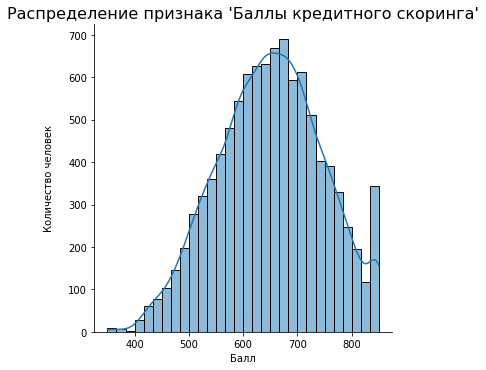

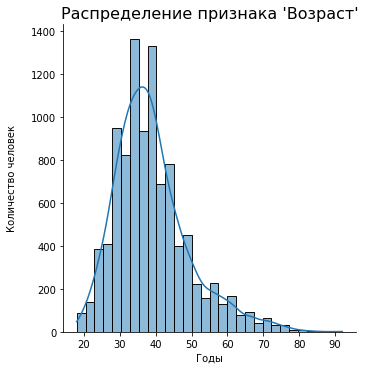

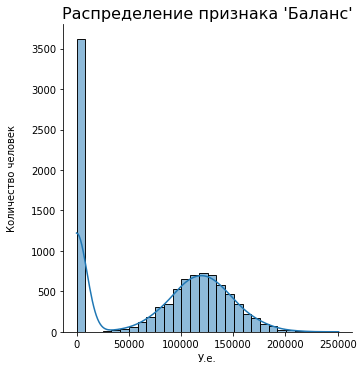

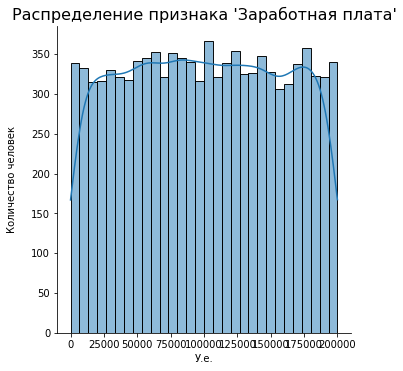

In [14]:
for col in num:
    sns.displot(df, x=col, kde=True, bins=30)
    plt.title(f"Распределение признака '{name[col]}'", fontsize=16)
    plt.ylabel('Количество человек', labelpad=14)
    plt.xlabel(unit[col])
    plt.show();

Следующая информация получена из гистограммы распределения числовых признаков:

- *Баллы кредитного скоринга* - распределение близко к нормальному, max - 850 баллов (этому значению соответствуют 350 человек);
- *Возраст* - присутствует правый длинный хвост, что логично, ведь max возраст клиента банка - 92 года;
- *Заработная плата* - отлично от нормального, распределение достаточно равномерное. В дальнейшем посмотрю на аномальные значения.

Для категориальных признаков буду использовать Barplot

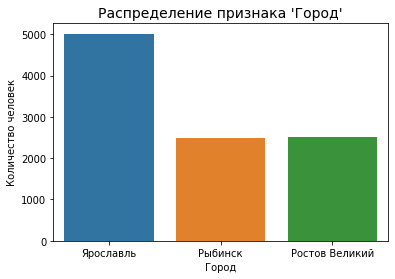

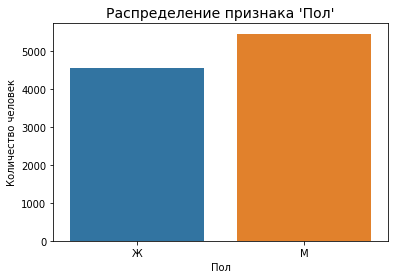

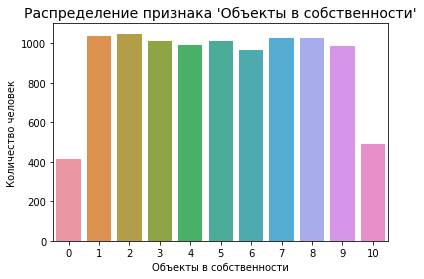

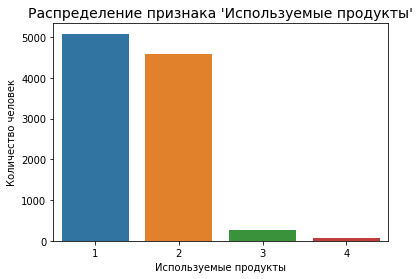

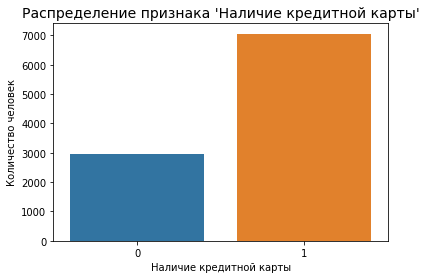

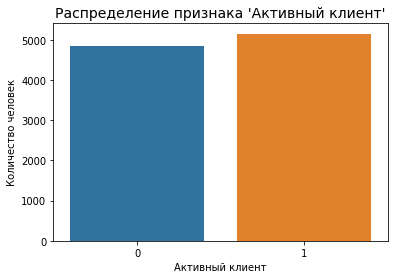

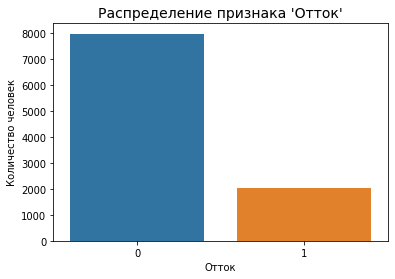

In [15]:
for col in cat:
    sns.countplot(x=col, data=df)
    plt.title(f"Распределение признака '{name[col]}'", fontsize=14)
    plt.ylabel('Количество человек')
    plt.xlabel(name[col])
    plt.show();

По данным из графиков категориальных переменных у меня есть следующая информация:

- Чуть меньше половины от общего количества клиентов банка проживает в *Ярославле* (что логично - Ярославль - крупный город);
- Мужчин больше, чем женщин (это тоже объяснимо, потому что мужчин чаще берут кредиты,  открывают инвестиционные счета; у женщин преимущественно зарплатные проекты и кредитные карты);
- *Количество объектов в собственности* - распределение равномерное;
- Чуть больше половины клиентов банка пользуются только **1** продуктом, около 4500 - **2**, около 500 - **3 и более**;
- Около 7000 используют кредитную карту банка;
- *Активных* и *неактивных* почти поровну, но *активных* чуть больше;
- Почти **2000** клиентов ушло в отток - значительная сумма.

<font color='blue'>Аномалии</font>

С помощью "ящика с усами" посмотрю на аномалии в данных

Boxplot для числовых признаков

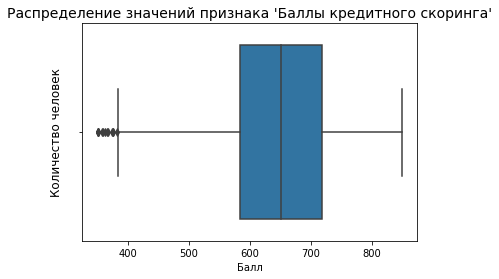

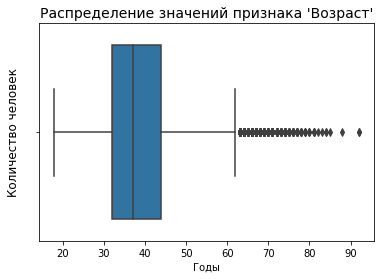

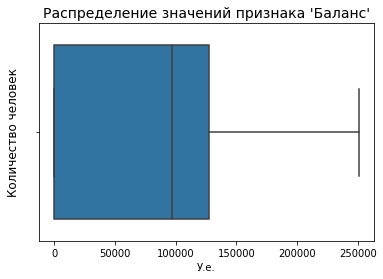

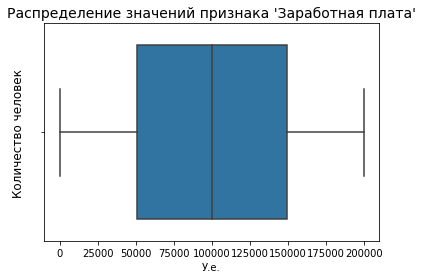

In [16]:
for col in num:
    sns.boxplot(x=df[col])
    plt.title(f"Распределение значений признака '{name[col]}'", fontsize=14)
    plt.ylabel('Количество человек', fontsize=12, labelpad=12)
    plt.xlabel(unit[col])
    plt.show();

Для стобцов age (Возраст) и score (Баллы кредитного скоринга) изучу перцентили

In [17]:
np.percentile(df['age'], [95, 97.5, 99])

array([60., 66., 72.])

- Старше 72 лет - *1%*;
- Старше 60 лет - *5%*.

С помощью этой информации можно сделать вывод - люди старшего (пенсионного) возраста не спешат пользоваться продукцией банка. Очевидно, что самым популярным банком у пенсионеров является *Сбер* и дочерний банк *ВТБ* - *Почта банк*. В связи с этим одной из первых рекомендаций будет - *разработка программы по взаимодействию с людьми в возрасте более 60 лет.* ([Рекомендации для сотрудников банка "Метанпромбанк"](#recomend))

In [18]:
np.percentile(df['score'], [5, 2.5, 1])

array([489., 461., 432.])

- Ниже 489 баллов - *5%*;
- Ниже 432 баллов - *1%*.

*Кредитный скоринг* - сам по себе рейтинг, который выставляется каждому посетителю банка. Чем он выше, тем более хорошая кредитная история у потенциального клиента. У большинства клиентов высокий кредитный скоринг - банк работает только с проверенными людьми. Это можно использовать в маркетинговой кампании. ([Рекомендации для сотрудников банка "Метанпромбанк"](#recomend))

<font color='blue'>Корреляционный анализ</font>

In [19]:
corr = pd.get_dummies(df)

In [20]:
corr.sample(n=10, random_state=0)

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
9394,15658489,597,35,8,131101.04,1,1,1,192852.67,0,1,0,0,1,0
898,15697436,523,40,2,102967.41,1,1,0,128702.10,1,0,0,1,1,0
2398,15676613,706,42,8,95386.82,1,1,1,75732.25,0,0,1,0,1,0
5906,15788359,788,32,4,112079.58,1,0,0,89368.59,0,0,0,1,0,1
2343,15808638,706,38,5,163034.82,2,1,1,135662.17,0,1,0,0,0,1
8225,15846878,670,57,3,175575.95,2,1,0,99061.75,1,0,1,0,1,0
5506,15739764,590,34,0,65812.35,2,0,1,160346.30,0,0,1,0,0,1
6451,15765319,636,29,6,157576.47,2,1,1,101102.39,0,0,1,0,1,0
2670,15803182,598,64,9,0.00,1,0,1,13181.37,1,0,0,1,1,0
3497,15631680,456,63,1,165350.61,2,0,0,140758.07,1,0,0,1,1,0


Столбцы *gender_Ж* и *gender_М* содержат одинаковую информацию. Следовательно, один я удалю (gender_Ж), а другой переименую в *gender* (gender_М). 

Информация в нем будет представлена следующим образом:
- пол Мужской - **1**
- пол Женский - **2**

In [21]:
corr = corr.drop(['gender_Ж'], axis=1)
corr = corr.rename(columns={"gender_М": "gender"})

Карта корреляций между признаками

In [22]:
corr_m = corr.drop('userid', axis = 1).corr()

In [23]:
labels = []
for col in corr.drop('userid', axis = 1).columns:
    labels.append(name[col])

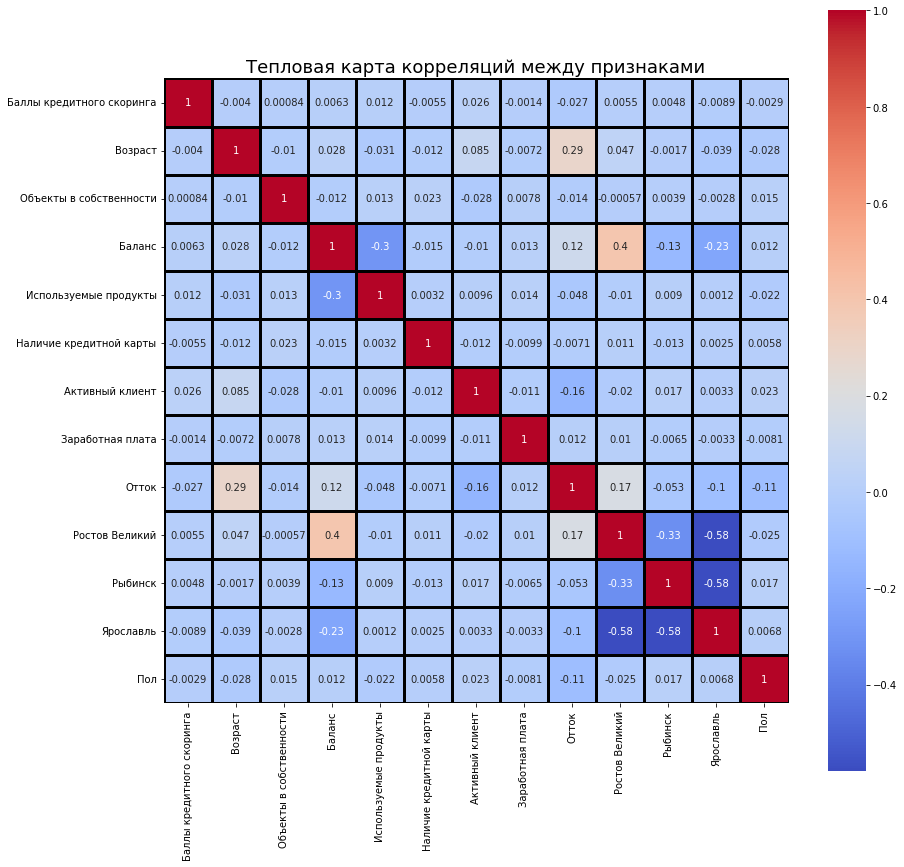

In [24]:
plt.figure(figsize = (14,14))
sns.heatmap(corr_m, square = True, annot = True, yticklabels = labels,
            xticklabels = labels, linecolor = 'black', linewidths = 3, cmap = 'coolwarm')
plt.title('Тепловая карта корреляций между признаками', fontsize = 18)
plt.show();

Согласно тепловой карты, можно сделать следующие выводы:
- Высоких показателей попарной корреляции **не наблюдается**;
- *Наибольшую* взаимосвязь можно отметить между *Баланском* и городом *Ростов Великий*;
- Коэффициент корреляции между оттоком и возрастом - **0.29**.
- *Количество используемых продуктов* не имеет корреляцию с другими показателями.

# <a id="segment"></a><font style="background-color: Cyan; color=black">3. Сегментация пользователей на основе данных о количестве потребляемых продуктов</font> #

In [25]:
df['products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

По количеству продуктов следующая ситуация:
- *1 продукт* - 5084 клиентов;
- *2 продукта* - 4590 клиентов;
- *3 продукта* - 266 клиентов;
- *4 продукта* - 60 клиентов.

Клиентов с 3 и 4 продуктами очень малое количество. Работа по увеличение клиентов с более, чем 2 продуктами - одно из направлений по развитию банка. В данный момент этих клиентов дя анализа я объединю с теми, у кого 2 продукта.

In [26]:
df.loc[df['products'] == 3, 'products'] = 2
df.loc[df['products'] == 4, 'products'] = 2

In [27]:
products = df.drop('userid', axis=1).groupby(by='products').mean()
products

,score,age,objects,balance,creditcard,loyalty,estimated_salary,churn
products,,,,,,,,
1,649.120968,39.673092,4.974626,98551.870614,0.703777,0.504131,99487.256851,0.277144
2,651.984744,38.144833,5.052278,53665.822352,0.707282,0.526444,100713.829329,0.127746


При анализе средних значений сразу бросается в глаза, что *Баланс* у клиентов с 1 продуктом больше (свыше 98000у.е.) других. Вероятно, это может быть связано с тем, что тот самый *1 продукт* у клиентов банка - *Дебетовая карта банка* или *Зарплатный проект* в этом банке. В то время как *2 продукта*, скорее всего, *кредитная карта* и *кредит*.

*Отток клиентов* составляет *27,7%* в группе с *1 продуктом*, *12,8%* в группе с *2 продуктами*.

Графики распределения признаков с разбивкой по группам.

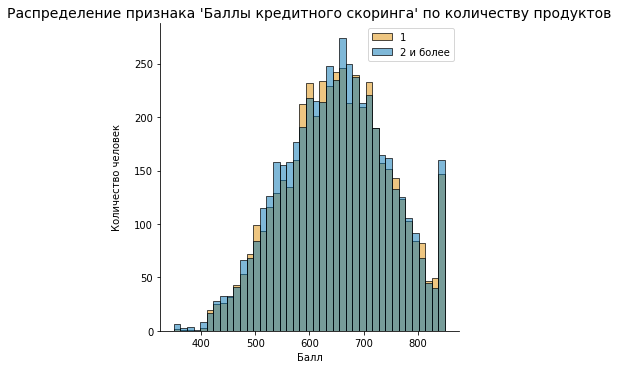

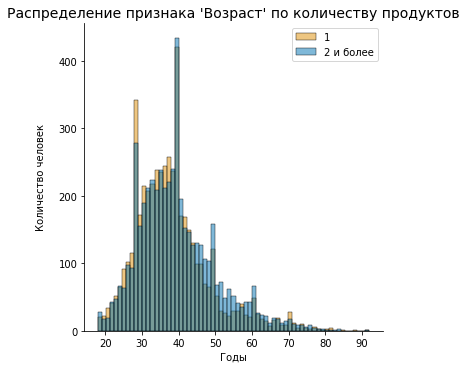

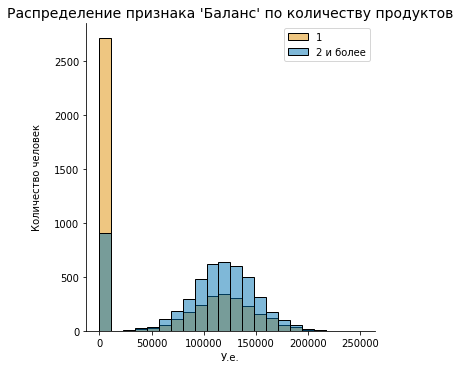

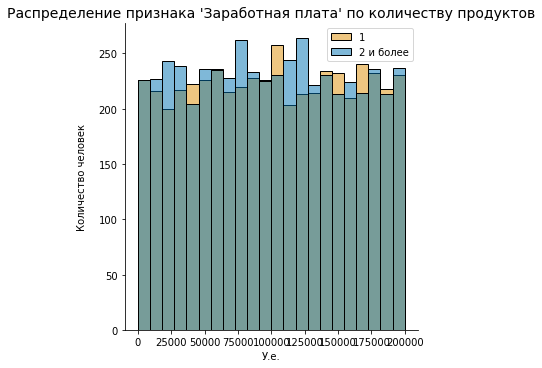

In [28]:
for col in num:
    sns.displot(df, x = col, hue = 'products', palette = 'colorblind', legend = False)
    plt.title(f"Распределение признака '{name[col]}' по количеству продуктов", fontsize = 14)
    plt.ylabel('Количество человек', labelpad = 12)
    plt.xlabel(unit[col])
    plt.legend(('1', '2 и более'))
    plt.show();

В группу с *1 продуктом* попало меньшее количество пользователей, по которым баланс отрицательный. Поэтому средний баланс в этой группе выше. Следовательно, в группе с *2 продуктами* больше пользователей кредитных продуктов (как и предполагалось ранее), отсюда и более низкий средний баланс. Показатели *Возраста*, *Кредитного скоринга* и *Заработной платы* распределены по группам более равномерно.

In [29]:
cat = ['gender', 'objects', 'creditcard', 'loyalty', 'churn', 'city']

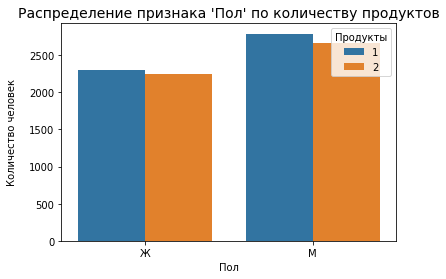

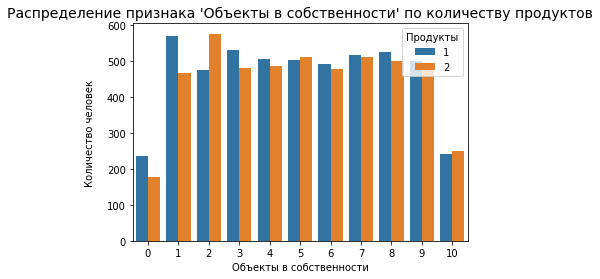

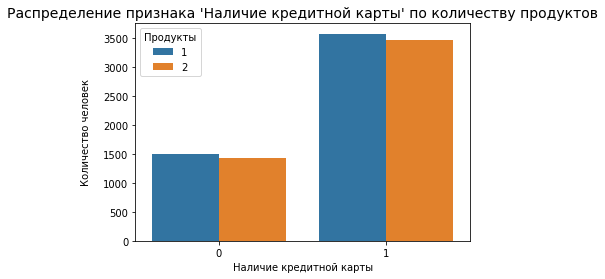

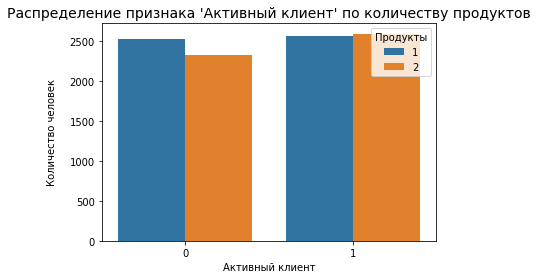

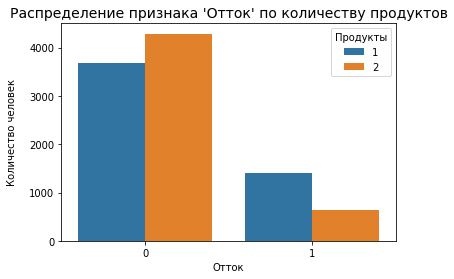

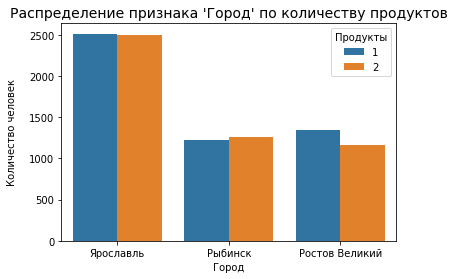

In [30]:
for col in cat:
    sns.countplot(x = col, data = df, hue = 'products')
    plt.title(f"Распределение признака '{name[col]}' по количеству продуктов", fontsize=14)
    plt.ylabel('Количество человек', labelpad=12)
    plt.xlabel(name[col])
    plt.legend(title="Продукты")
    plt.show();

По показателям *Пола*, *Объектов в собственности*, *Активности* и *Наличия кредитной карты* исследуемые группы практически не различаются. А вот показатель *Оттока* существенно ниже в группе с 2 и более продуктами.

Проанализирую сегменты по доходу и балансу с помощью boxplot

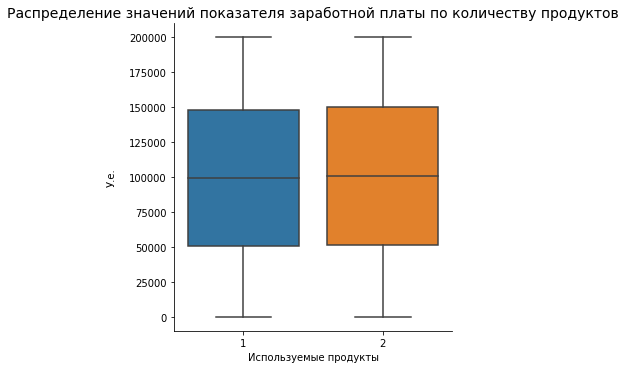

In [31]:
sns.catplot(x="products", y="estimated_salary", kind="box", data=df)
plt.title('Распределение значений показателя заработной платы по количеству продуктов', fontsize=14)
plt.ylabel(unit['estimated_salary'], labelpad=12)
plt.xlabel(name['products'])
plt.show();

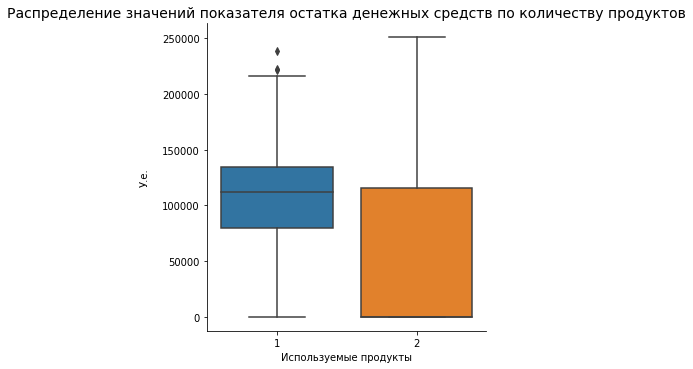

In [32]:
sns.catplot(x="products", y="balance", kind="box", data=df)
plt.title('Распределение значений показателя остатка денежных средств по количеству продуктов', fontsize=14)
plt.ylabel(unit['balance'], labelpad=12)
plt.xlabel(name['products'])
plt.show();

*Средняя заработная плата* и *распределение по квантилям* у обеих групп совпадает.

Для группы с *1 продуктом* характерен более высокий средний остаток, в то время как клиенты из группы с *2 продуктами* активнее используют кредитные счета и карты. Видно, что встречаются и клиенты из 2 группы с *высоким остатком*. Максимальный остаток на счете составляет 250000 у.е., а зарплата - 200000.

Далее посмотрю, отличаются ли сегменты по доходу и балансу территориально.

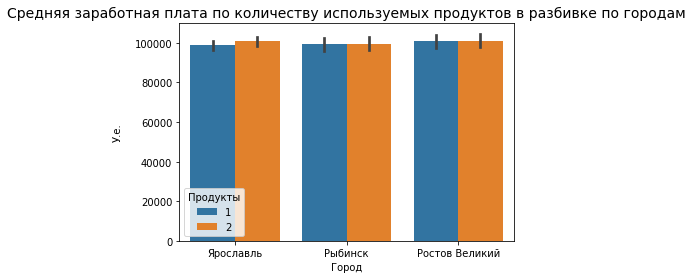

In [33]:
sns.barplot(x="city", y="estimated_salary", data=df, hue='products') 
plt.title("Средняя заработная плата по количеству используемых продуктов в разбивке по городам", fontsize=14)
plt.ylabel(unit['estimated_salary'], labelpad=12)
plt.xlabel(name['city'])
plt.legend(title="Продукты")
plt.show();

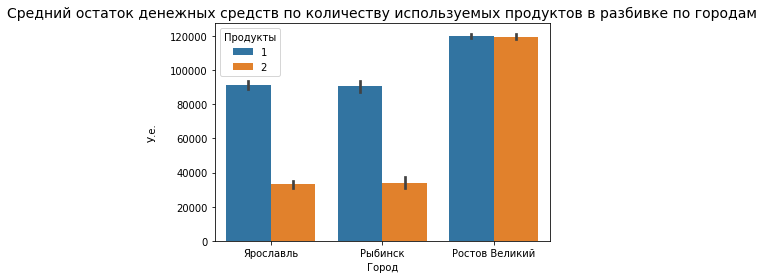

In [34]:
sns.barplot(x="city", y="balance", data=df, hue='products') 
plt.title("Средний остаток денежных средств по количеству используемых продуктов в разбивке по городам", fontsize=14)
plt.ylabel(unit['estimated_salary'], labelpad=12)
plt.xlabel(name['city'])
plt.legend(title="Продукты")
plt.show();

*Заработная плата* в городах равномерно распределена между группами. А вот *Баланс* в Ростове Великом выше, и примерно равен по группам (возможно, это связано с тем, что в малонаселенном городе Ростов Великий клиенты используют банк только для дебетовой карты). В Ярославле и Рыбинске баланс по группе с *1 продуктом* значительно превышает баланс по группе с *2 продуктами*.

Размер *Заработной платы* равномерно распределен между группами и по городам. 

Проанализирую *Отток* по группам используемых продуктов.

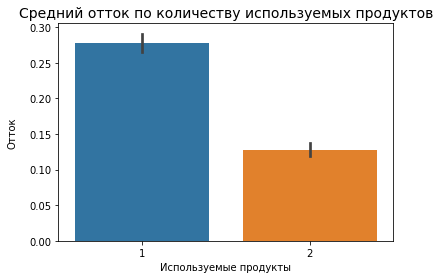

In [35]:
sns.barplot(y="churn", x='products', data=df) 
plt.title("Средний отток по количеству используемых продуктов", fontsize=14)
plt.ylabel(name['churn'], labelpad=12)
plt.xlabel(name['products'])
plt.show();

В среднем *Отток* в группе с *1 продуктом* выше и составляет *27 %* против *13%* у группы с *2 продуктами*.

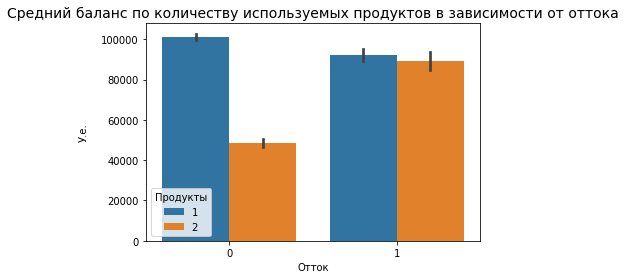

In [36]:
sns.barplot(x="churn", y="balance", data=df, hue='products') 
plt.title("Средний баланс по количеству используемых продуктов в зависимости от оттока", fontsize=14)
plt.ylabel(unit['estimated_salary'], labelpad=12)
plt.xlabel(name['churn'])
plt.legend(title="Продукты")
plt.show();

В *Отток* уходят клиенты с *большим балансом из второй группы* и *с меньшим - из первой*. Это означает, что происходит отток платежеспособных клиентов банка.

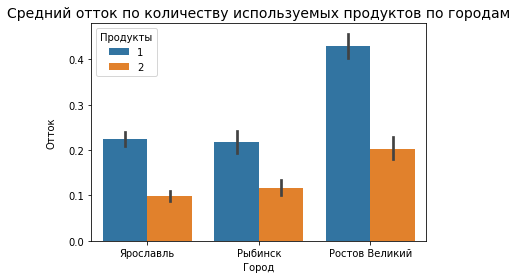

In [37]:
sns.barplot(x="city", y="churn", data=df, hue='products') 
plt.title("Средний отток по количеству используемых продуктов по городам", fontsize=14)
plt.ylabel(name['churn'], labelpad=12)
plt.xlabel(name['city'])
plt.legend(title="Продукты")
plt.show();

Наибольший уровень оттока в Ростове Великом в группе с 1 продуктом (более 40%).

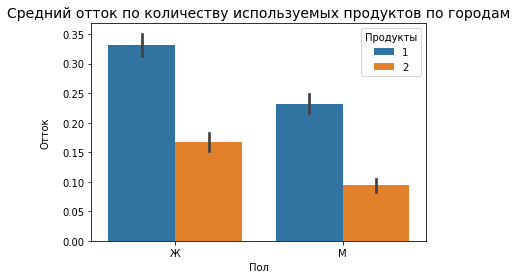

In [38]:
sns.barplot(x="gender", y="churn", data=df, hue='products') 
plt.title("Средний отток по количеству используемых продуктов по городам", fontsize=14)
plt.ylabel(name['churn'], labelpad=12)
plt.xlabel(name['gender'])
plt.legend(title="Продукты")
plt.show()

Отток у мужчин ниже, чем у женщин.

**Вывод**

- Для анализа клиентов по количеству потребляемых продуктов разделил выборку на 2 части: 
    - клиенты использующие 1 продукт, 
    - клиенты, использующие 2 и более продукта.
- Клиенты 1 группы имеют более высокий средний остаток на счете, который в среднем в 2 раза выше его заработной платы;
- Клиенты из группы с 2 продуктами активнее используют кредитные счета и карты, поэтому у них ниже средний остаток. При этом клиенты 2 группы реже уходят;
- В Ростове Великом средний баланс по группам одинаков, а в Рыбинске и Ярославле баланс по 1 группе выше;
- В Ростове Великом очень высокий показатель оттока в 1 группе, это клиенты с высоким доходом.

# <a id="gip"></a><font style="background-color: Cyan; color=black">4. Проверка статистических гипотез</font> #

**Гипотеза 1** - гипотеза различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

- **H0** - Различие средней зарплаты в группах 1 и 2 статистически незначимо.
- **H1** - Различие средней зарплаты в группах 1 и 2 статистически значимо.

В результате исследования я убедился в том, что распределение заработной платы далеко от нормального. Количество наблюдений достаточно (более 5000), для рассчета p_value буду использовать критерий Манна-Уитни.

In [39]:
prod_1 = df.loc[df['products'] == 1, 'estimated_salary']
prod_2 = df.loc[df['products'] == 2, 'estimated_salary']

result = st.mannwhitneyu(prod_1, prod_2, True, 'two-sided')

alpha = 0.05

print('p-значение: ', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.2850986972637063
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Группы **не отличаются** по среднему размеру заработной платы.

**Гипотеза 2** - гипотеза разницы в количестве баллов кредитного скоринга, которые пользуются двумя и более продуктами банка, и теми, которые пользуются одним. 

- **Н0** - средние показатели кредитного скоринга между теми клиентами, которые пользуются двумя и более продуктами банка, и теми, которые пользуются одним одинаковы
- **Н1** - средние показатели кредитного скоринга между теми клиентами, которые пользуются двумя и более продуктами банка, и теми, которые пользуются одним различаются

Критерий для проверки гипотез: t-Критерий Стьюдента.
equal_var = False, так как дисперсии выборок нельзя считать равными.

In [40]:
prod_1_score = df.loc[df['products'] == 1, 'score']
prod_2_score = df.loc[df['products'] == 2, 'score']

alpha = 0.05
result = st.ttest_ind(prod_1_score, prod_2_score, equal_var = False)
print('p-value равен', result.pvalue)
if  result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-value равен 0.13846764921869667
Не удалось отвергнуть нулевую гипотезу


# <a id="gip"></a><font style="background-color: Cyan; color=black">5. Общий вывод</font> #

Мною были изучены данные о клиентах банка "Метанпромбанк". Данные были получены от клиентов посредством анкетирования, далее они были внесены в систему CRM сотрудниками банка, после предоставлены мне.

Датафрейм содержит информацию о **10000** клиентах банка по следующим пунктам:
- пол;
- возрасть;
- город проживания;
- баланс;
- зарплата;
- количество объектов в собственности;
- количество используемых продуктов;
- наличие кредитной карты;
- лояльность клиента;
- отток клиентов.

После проведенного анализа мною были получена следующая информация:
- Почти половина клиентов из Ярославля. Остальные поровну поделены между Рыбинском и Ростовом Великим;
- Средний возраст - **39 лет**;
- Мужчин больше, чем женщин почти на 1000 человек;
- По количеству продуктов пользователи распределились:
    1. *1 продукт* - 5084 клиентов;
    2. *2 продукта* - 4590 клиентов;
    3. *3 продукта* - 266 клиентов;
    4. *4 продукта* - 60 клиентов;
- Средняя зарплата состовляет около 100000 у.е.;
- **70%** клиентов имеют кредитную карту;
- Лояльных клиентов - **51%**;
- В отток попало **20,4%** клиентов.

По результатам корреляционного анализа сильных корреляций **не наблюдается**.
Небольшуая положительная взаимосвязь прослеживается между признаками *Баланс* и *местонахождением* клиента, между *Возрастом* и *оттоком*. Отрицательная - между *Оттоком* и *количеством продуктов*.

В ходе сегментации клиентов я получил следующие выводы:

- Общая выборка клиентов банка была поделена на 2 части: клиенты использующие **1 продукт** и клиенты, использующие **2 и более продукта**;
- Клиенты *1 группы* имеют более высокий средний остаток на счете, который в среднем в 2 раза выше его заработной платы;
- Клиенты из группы с *2 продуктами и более* активнее используют кредитные счета и карты, поэтому у них ниже средний остаток. При этом клиенты 2 группы *реже уходят*;
- В Ростове Великом средний баланс по группам одинаков, а в Рыбинске и Ярославле баланс по *1 группе* выше;
- В Ростове Великом очень высокий показатель оттока в *1 группе*, это клиенты с высоким доходом. 

# <a id="recomend"></a><font style="background-color: Cyan; color=black">6. Рекомендации для сотрудников банка "Метанпромбанк"</font> #

1. Разработка программы по взаимодействию с клиентами пенсионного возраста. Таких клиентов у банка очень мало. Предложить получать пенсию на счет в "Метанпромбанке", льготные условия по тарифам. И, на мой взгляд, предложить им модное сейчас, но неизвестный пока для них, повышенный кешбэк в магазинах продуктовых и первой необходимости и на лекарства. Активнее работать с привлечением возрастных клиентов (реклама), проработка мобильного приложения для удобства пользования людям пожилого возраста. 

2. Маркетинговая кампания, направленная на привлечение клиентов с хорошей кредитной историей. Большая часть клиентов банка обладает высоким уровнем кредитного скоринга, что можно использовать, как "наживу". "Нашим банком пользуются только успешные люди" можно использовать, как слоган.

3. У клиентов с 1 продуктом средний баланс заметно выше, чем у второй. Значит, надо пустить их деньги в оборот банка. Предложить им инвестиционные продукты банка, вклады под повышенный процент, кредиты, по льготным условиям (больший срок или меньший процент), увеличенный беспроцентный период по кредитным картам.

4. Проработать систему по сбору информации от клиентов банка. Анкетирование с последующим ручным переносом данных - устаревший ход, который влечет за собой ошибки (зарплата где-то заполнена оценочным путем). 

5. Женщин меньше, надо проработать эту категорию. Можно сыграть по тактике, как и с пенсионерами, с повышенным кешбэком, только категории сделать салоны красоты, магазины косметики и одежды. Сделать кредитные карты "для женщин" - возможность создать карточку со своим дизайном, предложить интересный тариф по аналогии, как указано выше. 

6. Детально изучить ситуацию с банком в городе Ростов Великий. Там отмечается наибольший отток. 

# <a id="dop"></a><font style="background-color: Cyan; color=black">7. Дополнительные материалы по исследованию</font> #

<a id="prezent"></a>7.1. Ссылка на презентацию</font> - https://yadi.sk/i/qUjz9lPQyI_zNA

<a id="dash"></a>7.2. Ссылка на дашборд</font> - https://public.tableau.com/app/profile/dgulidov/viz/__16395976569200/sheet1